In [1]:
import numpy as np
import matplotlib.pyplot as plt
from icemeltmodels import TwoEquationMeltModel, ThreeEquationMeltModel

In [2]:
U_ref = 0.1
T = np.linspace(-2, 5)
S_ref = 35.0
p_ref = 100000.0

In [3]:
model2 = TwoEquationMeltModel()
model3 = ThreeEquationMeltModel()

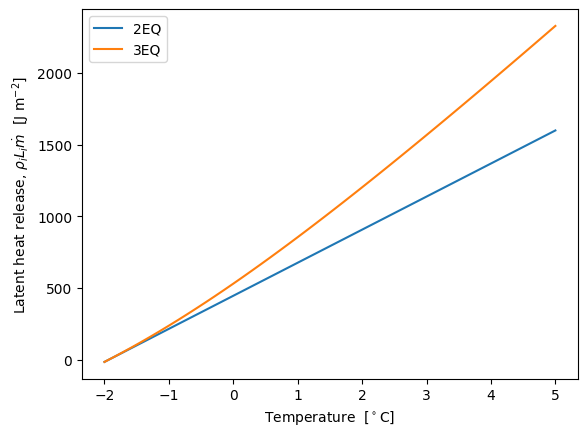

In [4]:
latent2 = model2.latent_heat_release(U_ref, T, S_ref, p_ref)
latent3 = model3.latent_heat_release(U_ref, T, S_ref, p_ref)

fig, ax = plt.subplots()
ax.plot(T, latent2, label="2EQ")
ax.plot(T, latent3, label="3EQ")
ax.set_xlabel(r"Temperature  [$^\circ$C]")
ax.set_ylabel(r"Latent heat release, $\rho_i L_i \dot{m}$  [J m$^{-2}$]")
ax.legend()

ThreeEquationMeltModelNeglectingConduction ocean_heat_flux()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()
Using ThreeEquationMeltModel boundary_salinity()


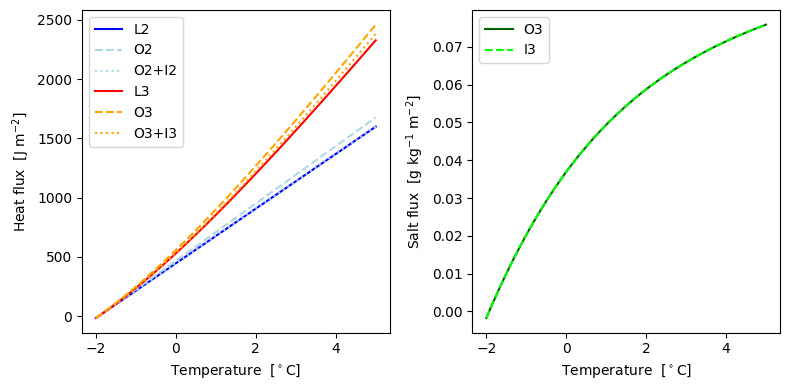

In [6]:
ocean2 = model2.ocean_heat_flux(U_ref, T, S_ref, p_ref)
ocean3 = model3.ocean_heat_flux(U_ref, T, S_ref, p_ref)
ice2 = model2.ice_heat_flux(U_ref, T, S_ref, p_ref)
ice3 = model3.ice_heat_flux(U_ref, T, S_ref, p_ref)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax.plot(T, latent2, color="blue", ls="solid", label="L2")
ax.plot(T, ocean2, color="lightblue", ls="dashed", label="O2")
ax.plot(T, ocean2 + ice2, color="lightblue", ls="dotted", label="O2+I2")

ax.plot(T, latent3, color="red", ls="solid", label="L3")
ax.plot(T, ocean3, color="orange", ls="dashed", label="O3")
ax.plot(T, ocean3 + ice2, color="orange", ls="dotted", label="O3+I3")

ax.set_xlabel(r"Temperature  [$^\circ$C]")
ax.set_ylabel(r"Heat flux  [J m$^{-2}$]")
ax.legend()

oceansalt3 = model3.ocean_salt_flux(U_ref, T, S_ref, p_ref)
icesalt3 = model3.ice_salt_flux(U_ref, T, S_ref, p_ref)

ax2.plot(T, oceansalt3, color="darkgreen", ls="solid", label="O3")
ax2.plot(T, icesalt3, color="lime", ls="dashed", label="I3")
ax2.set_xlabel(r"Temperature  [$^\circ$C]")
ax2.set_ylabel(r"Salt flux  [g kg$^{-1}$ m$^{-2}$]")
ax2.legend()

plt.tight_layout()

## Discrepancy

The heat flux budget for the TwoEquationMeltModel() closes successfully.

However, for the ThreeEquationMeltModel, 
the salt budget closes ("O3" = "I3" in the right-hand plot above)
but the heat flux budget does not close!
We expect O3 + I3 = L3, but the O3 + I3 curve appears to lie slightly above the L3 curve.

This should be investigated further!